Deriving the Normal Distribution from the Binomial Distribution

# Purpose

The purpose of this page, is to derive the Normal Distribution from the Binomial Distribution as a reference for the Galton Board project.  For the purposes of predicting the probability of a ball reaching a certain bucket, the Binomial distribution will be used.  The derivation of the Poisson and the Guassian distributions has been added for fun.

# Binomial Distribution

One question that gets asked when observing the results of a Galton Board is, given a number of balls to be dropped into the Galton Board, how can we predict the number of balls in any of the buckets?  And what is the probability of the next ball reaching a specific bucket.  This section answers these questions.

## Why is it Important?

The Binomial distribution is a fundamental way to calculate the probability of a path, k, in a tree of $2^{n}$ possible results.  There may be, as we saw in the Galton Board, several ways to traverse the board to get a point that is between bondaries.  For example, with a board that is 4 levels deep, there are 5 ending points (or buckets).  To end up in either the first or the last bucket, only one path can be traversed.  For the second and the fourth buckets, there are 4 possbile paths and for the middle bucket there are 6 possible paths. 

|Bucket Number|Possible Paths|Number of Paths|
| :-: | :-: | :-: |
|1|LLLL|1|
|2|RLLL, LRLL, LLRL, LLLR|4|
|3|RRLL, RLRL, RLLR, LRRL, LRLR, LLRR|6|
|4|LRRR, RLRR, RRLR, RRRL|4|
|5|RRRR|1|

The total number of possible paths is 1 + 4 + 6 + 4 + 1 = 16 = $2^4$.  The probability of reaching any bucket is the number of possible paths to get to that bucket divided by the total number of possible paths.  The following table includes the probability of reaching the final state of any bucket.  

|Bucket Number|Possible Paths|Number of Paths|Probability|
| :-: | :-: | :-: | :-:|
|1|LLLL|1|1/16 = 0.0625|
|2|RLLL, LRLL, LLRL, LLLR|4|4/16 = 0.25|
|3|RRLL, RLRL, RLLR, LRRL, LRLR, LLRR|6|6/16 = 0.375|
|4|LRRR, RLRR, RRLR, RRRL|4|4/16 = 0.25|
|5|RRRR|1|1/16 = 0.0625|

Note that the sum of the probabilities has to be 1, otherwise there are paths that have not been accounted for.  In this example, the sum of the probabilities: 0.0625 + 0.25 + 0.375 + 0.25 + 0.0625 = 1. 

Picture a Galton Board configuration in which the depth is 100.  To perform the same manual analysis on this board to list all of the possible paths to get to a single bucket would take a long time.  There are a total of $2^{100} = 1.267 \cdot 10^{30}$ possbilities.  Good luck with that without writing a program!

So how can we determine the number of possible paths to get to a bucket (endpoint) for any given board of depth d?  The answer lies in the Binomial Distribution. 

Let's start by asking how many ways can we get to a bucket?  That is answered using combinatorics.  Specifically, if we have n steps, the number of possible ways we can get to the k-th bucket is

\begin{align}
\frac{n!}{k! \cdot (n - k)!}
\end{align}

Referring to the example above for a board of depth 4, we can calculate the number of paths to each bucket.  Note that $k \leq n$.

|Bucket Number (0 index)|Possible Paths|Number of Paths|
| :-: | :-: | :-: |
|0|LLLL|$\frac{4!}{0! \cdot (4 - 0)!} = \frac{4!}{4!}$ = 1|
|1|RLLL, LRLL, LLRL, LLLR|$\frac{4!}{1! \cdot (4 - 1)!} = \frac{4!}{3!}$ = 4|
|2|RRLL, RLRL, RLLR, LRRL, LRLR, LLRR|$\frac{4!}{2! \cdot (4 - 2)!} = \frac{4!}{2 \cdot 2}$ = 6|
|3|LRRR, RLRR, RRLR, RRRL|$\frac{4!}{3! \cdot (4 - 3)!} = \frac{4!}{3!}$ = 4|
|4|RRRR|$\frac{4!}{4! \cdot (4 - 4)!} = \frac{4!}{4!}$ = 1|

Now the we know how to calculate the number of ways to reach an endpoint k, given a path of n steps, the next step is to determine how to calculate the probability of reaching endpoint k.  

This is where the Binomial Distribution takes center stage.  It states that given the number of possible paths to get to an endpoint, the probability of reaching that endpoint k is

\begin{align}
P = \binom{n}{k} \cdot p^k \cdot (1 - p)^{n-k}
\end{align}

For the Galton board, p = 1/2 because there is an equal chance of the ball going left or right.  Therefore,
\begin{align}
P &= \binom{n}{k} \cdot p^k \cdot (1 - p)^{n-k} \\
&= \binom{n}{k} \cdot (\frac{1}{2} )^k \cdot (1 - \frac{1}{2} )^{n-k} \\
&= \binom{n}{k} \cdot (\frac{1}{2} )^k \cdot (\frac{1}{2} )^{n-k} \\
&= \binom{n}{k} \cdot (\frac{1}{2} )^n \\
&= \frac{n!}{k! \cdot (n - k)!} \cdot (\frac{1}{2} )^n 
\end{align}

Now the probabilities can be added to the table:

|Bucket Number (0 index)|Possible Paths|Number of Paths|Probability (#Paths x $\cdot (\frac{1}{2})^n$) |
| :-: | :-: | :-: | :-: |
|0|LLLL|$\frac{4!}{0! \cdot (4 - 0)!} = \frac{4!}{4!}$ = 1| $1 \cdot (\frac{1}{2})^4 $ = 1/16 = 0.0625|
|1|RLLL, LRLL, LLRL, LLLR|$\frac{4!}{1! \cdot (4 - 1)!} = \frac{4!}{3!}$ = 4| $4 \cdot (\frac{1}{2})^4 $ = 4/16 = 0.25|
|2|RRLL, RLRL, RLLR, LRRL, LRLR, LLRR|$\frac{4!}{2! \cdot (4 - 2)!} = \frac{4!}{2 \cdot 2}$ = 6| $6 \cdot (\frac{1}{2})^4 $ = 6/16 = 0.375|
|3|LRRR, RLRR, RRLR, RRRL|$\frac{4!}{3! \cdot (4 - 3)!} = \frac{4!}{3!}$ = 4| $4 \cdot (\frac{1}{2})^4 $ = 4/16 = 0.25|
|4|RRRR|$\frac{4!}{4! \cdot (4 - 4)!} = \frac{4!}{4!}$ = 1| $1 \cdot (\frac{1}{2})^4 $ = 1/16|

Now we have a way to calculate the number of paths that can be traversed in a Galton Board, to reach a specific endpoint or bucket.

## Example

The following code calculates each Binomial coefficient for any board depth, and then plots the data.  Note how the shape of the plot changes when the board depth approaches 10.

**** Galton Board Output for Depth 100 ****
**** Possible Paths 1.267651e+30 
Bucket, Possible Paths, Probability Frac, Probability
     0,1.00000e+00,1.00000e+00/1.26765e+30,7.88861e-31
     1,1.00000e+02,1.00000e+02/1.26765e+30,7.88861e-29
     2,4.95000e+03,4.95000e+03/1.26765e+30,3.90486e-27
     3,1.61700e+05,1.61700e+05/1.26765e+30,1.27559e-25
     4,3.92122e+06,3.92122e+06/1.26765e+30,3.09330e-24
     5,7.52875e+07,7.52875e+07/1.26765e+30,5.93914e-23
     6,1.19205e+09,1.19205e+09/1.26765e+30,9.40364e-22
     7,1.60076e+10,1.60076e+10/1.26765e+30,1.26277e-20
     8,1.86088e+11,1.86088e+11/1.26765e+30,1.46797e-19
     9,1.90223e+12,1.90223e+12/1.26765e+30,1.50060e-18
    10,1.73103e+13,1.73103e+13/1.26765e+30,1.36554e-17
    11,1.41630e+14,1.41630e+14/1.26765e+30,1.11726e-16
    12,1.05042e+15,1.05042e+15/1.26765e+30,8.28636e-16
    13,7.11054e+15,7.11054e+15/1.26765e+30,5.60923e-15
    14,4.41869e+16,4.41869e+16/1.26765e+30,3.48574e-14
    15,2.53338e+17,2.53338e+17/1.26765e+30,

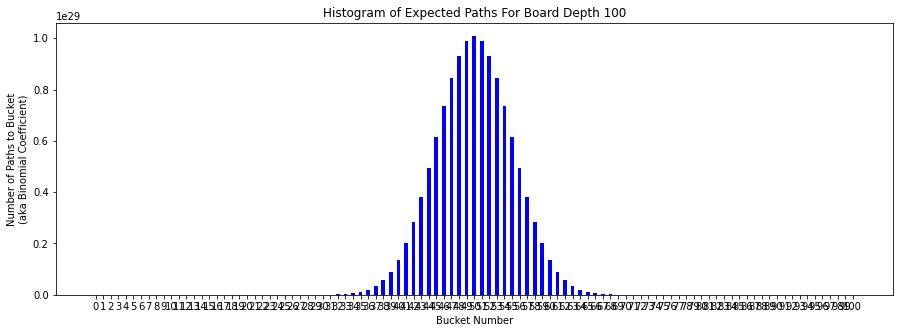

In [15]:
import math
import matplotlib.pyplot as plt
import numpy as np

SMALL_BOARD_DEPTH = 15

def binomialCoefficient(n: int, k: int):
    """Ensure n and k and the return value are integers"""
    nFactorial = math.factorial(n)
    kFactorial = math.factorial(k)
    diffFactorial = math.factorial(n - k)
    
    return int(nFactorial/(kFactorial * diffFactorial))

def probabilityForBucket(c: int, t: int):
    """Calculate the probability of reaching each endpoint."""
    return float(c/t)

def addLabelValues(buckets, values):
    """Add the y value to a bar."""
    for i in range(len(buckets)):
        plt.text(i,values[i],values[i], ha = 'center',
                 bbox = dict(facecolor = 'red', alpha =0.8))    
    
    return    
 
def plotResults(dataDict):
    """Plot a bar graph of the results"""
    buckets = list(dataDict.keys())
    values = list(dataDict.values())
    nBuckets = len(buckets)
    
    fig = plt.figure(figsize = (15, 5))    
    plt.bar(buckets, values, color = 'blue', width = 0.5)
    
    plt.xlabel("Bucket Number")
    plt.xticks(buckets)
    plt.ylabel("Number of Paths to Bucket\n(aka Binomial Coefficient)")
    plt.title(f'Histogram of Expected Paths For Board Depth {nBuckets - 1:d}')
    
    # The plot looks messy if the y-values are printed for large boards.
    if len(buckets) <= SMALL_BOARD_DEPTH:
        addLabelValues(buckets, values)
    plt.show()
    
    return

def printHeader(boardDepth : int , totalPaths : int ):
    """boardDepth (int), totalPaths (int)
        Print a common header for tabular output.
    """        
    print (f'**** Galton Board Output for Depth {boardDepth} ****')
    if boardDepth <= SMALL_BOARD_DEPTH:
        print (f'**** Possible Paths {totalPaths:d} ')
    else:
        print (f'**** Possible Paths {totalPaths:2.6e} ')

    return

def printData( boardDepth : int , totalPaths : int, bucket : int, coeff : int, prob : float ):
    """boardDepth (int), totalPaths (int), bucket (int), coeff (int), prob (float)
        prints the data in csv format
    """       
    # special formatting based on the expected size of the numbers
    if boardDepth <= SMALL_BOARD_DEPTH:
        print (f'{bucket:6d},{coeff:15d},{coeff:10d}/{totalPaths:d},{prob:4.6f}')
    else:
        print (f'{bucket:6d},{coeff:2.5e},{coeff :2.5e}/{totalPaths:2.5e},{prob:2.5e}')
    
    return
    
def generateData(boardDepth : int , totalPaths : int ):
    """boardDepth (int), totalPaths (int)
        return a list of data
    """
    data = []

    printHeader(boardDepth, totalPaths)    
    
    print (f'Bucket, Possible Paths, Probability Frac, Probability')
    for bucket in range(boardDepth + 1):
        b = binomialCoefficient(boardDepth, bucket)
        p = probabilityForBucket(b, totalPaths)
       
        printData(boardDepth, totalPaths, bucket, b, p)
        
        # add to the list of data    
        data.append(b)
 
    return data
    
def createPlot(data):
    """data is a list.
       This method will convert Adthe list to a dictionary and pass it
       to a function to create a plot.
    """
    dataDict = {}

    # the dictionary needs to be zero based as the index is the bucket number
    for i in range(len(data)):
        dataDict[i]= data[i]
        
    plotResults(dataDict)

    return
    
    
# Client side code
def main(boardDepth = 30):
    totalPaths = 2 ** boardDepth
    
    createPlot(generateData(boardDepth, totalPaths))
    
    return
    
# main method
if __name__ == '__main__':
    main(boardDepth = 100)

## Derive the Mean and the Variance

It is common to ask what the average is of a distribuion. The purpose of this section is to derive the mean (the fancy was to say average in mathematese).

### Deriving the Binomial Distribution Mean

The mean of a distribution is defined by

\begin{align}
E(x) = \mu = \sum_{x=0}^{n} x P(x)
\end{align}

Note the following as it will be used later.
\begin{align}
(a + b)^n &= \sum_{x=0}^{n} \binom{n}{x} a^x b^{n - x} \\
&= \sum_{x=0}^{n} \frac{n!}{x! \cdot (n - x)!}  a^x b^{n - x}
\end{align}

For example, if we want to expand $(a + b)^3$ using the sum of the terms with Binomial coefficients, the result is:
\begin{align}
(a + b)^3 &= \sum_{x=0}^{3} \binom{3}{x} a^x b^{3 - x} \\
&= \frac{3!}{ \underbrace{0!}_{\text{= 1}} \cdot (3 - 0)!} a^0 b^{3-0} + \frac{3!}{1! \cdot (3 - 1)!} a^1 b^{3-1} + \frac{3!}{2! \cdot (3 - 2)!} a^2 b^{3-2} + \frac{3!}{3! \cdot (3 - 3)!} a^3 b^{3-3} \\
&= b^3 + 3 a b^2 + 3 a^2 b + a^3 \\
&= a^3 + 3 a b^2 + 3 a^2 b + b^3 
\end{align}


To calculate the mean
\begin{align}
E(x) &= \sum_{x=0}^{N} x P(x) \\
&= \sum_{x = 0}^{N} \underbrace{x \cdot \frac{n!}{x! \cdot (n - x)!}  p^x (1 - p)^{n - x}}_{\text{=0 when x = 0}} \\
&= \sum_{x = 1}^{N} x \cdot \frac{n!}{x! \cdot (n - x)!}  p^x (1 - p)^{n - x} \\
&= \sum_{x = 1}^{N} \frac{n!}{(x - 1)! \cdot (n - x)!}  p^x (1 - p)^{n - x} \\
&= n \sum_{x = 1}^{N} \frac{(n - 1)!}{(x - 1)! \cdot (n - x)!}  p^x (1 - p)^{n - x} \\
&= np \sum_{x = 1}^{N} \frac{(n - 1)!}{(x - 1)! \cdot \underbrace{(n - x)}_{=(n - 1) - (x - 1)}!}  (1 - p)^{x - 1} p^{n - x} \\
&= np \sum_{x = 1}^{N} \frac{(n - 1)!}{(x - 1)! \cdot [(n - 1) - (x - 1)]!}  p^{x - 1} (1 - p)^{(n - 1) - (x - 1)} \\
\text{let m = n - 1 and y = x - 1}  \\
&= np \sum_{y = 0}^{m} \frac{m!}{y! \cdot (m - y)!}  p^{y} (1 - p)^{(m - y)}    \\
&= np \underbrace{\sum_{y = 0}^{m} \binom{m}{y}  p^{y} (1 - p)^{(m - y)}}_{= (a + b)^m} \\
\text{substitute a = p and b = 1 - p} \\
&= np \cdot (p + (1 - p) )^m \\
&= np \cdot 1^m \\
&= np
\end{align}


### Deriving the Binomial Distribution Variance

The variance of a distribution is the difference between x and the mean of the distribution.  It is defined by

\begin{align}
var(x) &= [(x - \mu)^2] \\
&= E(x^2) - [\underbrace{E(x)}_{\text{= np}}]^2
\end{align}

Need to find $E(x^2)$.
\begin{align}
E(x^2) &= \sum_{x=0}^{N} x^2 P(x)
\end{align}

The trick to this is to calculate $E[(x(x-1)] = E(x^2 - x) = E(x^2) - E(x)$.
\begin{align}
E(x^2 - x) &= \sum_{x=0}^{N} x^2 P(x) \\
&= \sum_{x = 0}^{N} \underbrace{x(x-1) \cdot \frac{n!}{x! \cdot (n - x)!}  p^x (1 - p)^{n - x}}_{\text{=0 when x = 0 and x = 1}} \\
&= \sum_{x = 2}^{N} x(x-1) \cdot \frac{n!}{x \cdot (x - 1) \cdot (x - 2)! \cdot (n - x)!}  p^x (1 - p)^{n - x} \\
&= \sum_{x = 2}^{N} \cdot \frac{n!}{(x - 2)! \cdot (n - x)!}  p^x (1 - p)^{n - x} \\
\text{since the sum starts with an index of 2,} \\
\text{certain terms will be pulled out.} \\
&= n \cdot (n - 1) \sum_{x = 2}^{N} \cdot \frac{(n - 2)!}{(x - 2)! \cdot (n - x)!}  p^x (1 - p)^{n - x} \\
&= n \cdot (n - 1) \cdot p^2 \sum_{x = 2}^{N} \cdot \frac{(n - 2)!}{(x - 2)! \cdot \underbrace{(n - x)}_{= (n - 1) - (x - 1)}!}  p^{x - 2} (1 - p)^{n - x} \\
&= n \cdot (n - 1) \cdot p^2 \sum_{x = 2}^{N} \cdot \frac{(n - 2)!}{(x - 2)! \cdot [(n - 1) - (x - 1)]!}  p^{x - 2} (1 - p)^{[(n - 1) - (x - 1)]} \\
\text{let m = n - 2 and y = x - 2}  \\
&= n \cdot (n - 1) \cdot p^2 \sum_{y=0}^{m} \cdot \frac{m!}{y! \cdot (m - y)!}  p^{y} (1 - p)^{m - y} \\
&= n \cdot (n - 1) \cdot p^2 \underbrace{\sum_{y = 0}^{m} \binom{m}{y}  p^{y} (1 - p)^{(m - y)}}_{= (a + b)^m} \\
\text{substitute a = p and b = 1 - p} \\
&= n(n-1)p^2 \cdot (p + (1 - p) )^m \\
&= n(n-1)p^2 \cdot 1^m \\
&= n(n-1)p^2
\end{align}

\begin{align}
E(x^2 - x) &= E(x^2) - E(x) \\
&= E(x^2) - np =  n(n-1)p^2 
\end{align}

Therefore, 
\begin{align}
E(x^2) =  n(n-1)p^2 + np 
\end{align}

and the variance is then 
\begin{align}
var(x) &=  E(x^2) - [E(x)]^2 \\
&= n(n-1)p^2 + np - (np)^2 \\
&= (np)^2 - np^2 + np - (np)^2 \\
&= np - np^2 \\
&= np (1 - p)
\end{align}


# Poisson Distribution 

The Binomial Distribution defines how to calculate the probability of reaching a certain endpoint which there are k ways to randomly traverse a path of n layers.  What happens when there are hundreds or thousands of random paths to traverse in a board that is a million, or even a billion layers deep?  How do we calculate the coefficients of each bucket when 1,000,000! is a huge number?  Is this practical?

It turns out as the depth of the board (number of layers to traverse) approaches a large number, and the probability of reaching any of the endpoints becomes really small, we can approximate the result of the Binomial Distribution with the values calcualted from another distribution called the Poisson Distribution.

Let's work through this.  

## Derivation of the Poisson Distribution

Assume that np is a constant ($\lambda$).  The Binomial Distribution can then be written as
\begin{align}
P &= \binom{n}{x} \cdot (\frac{\lambda}{n})^x \cdot (1 - \frac{\lambda}{n})^{n-x} \\
&= \frac{n!}{x! \cdot (n - x)!} \cdot (\frac{\lambda}{n})^x \cdot (1 - \frac{\lambda}{n})^{n - x}  \\
&= (\frac{\lambda}{n})^x \cdot \frac{n!}{x! \cdot (n - x)!}  \cdot (1 - \frac{\lambda}{n})^{n - x}  \\
&= (\frac{\lambda^x}{n^x}) \cdot \frac{n!}{x! \cdot (n - x)!}  \cdot (1 - \frac{\lambda}{n})^{n - x}  \\
&= (\frac{\lambda^x}{x!}) \underbrace{\cdot \frac{n!}{n^x \cdot (n - x)!}}_{= \frac{n \cdot (n-1) \cdot (n-2) \cdot (n-x+1) \cdot (n-x) \cdot (n-x-1) \cdot (n-x-2) \cdots 2 \cdot 1}{(n-x)! \cdot n \cdot n \cdot n \cdot \cdots n \cdot}}  \cdot (1 - \frac{\lambda}{n})^{n - x}  \\
&= (\frac{\lambda^x}{x!}) \frac{n(n-1)(n-2)\cdots(n-x+1)(n-x)!}{(n-x)!n^x} \cdot (1 - \frac{\lambda}{n})^{n - x}  \\
&= (\frac{\lambda^x}{x!}) \underbrace{\frac{n(n-1)(n-2)\cdots(n-x+1)}{n^x}}_{\text{x terms in numerator and denominator.}} \cdot (1 - \frac{\lambda}{n})^{n - x}  \\
&= (\frac{\lambda^x}{x!}) \left[\frac{n}{n} \cdot \frac{(n-1)}{n} \cdot \frac{(n-2)}{n} \cdots \frac{(n-x+1)}{n} \right] \cdot (1 - \frac{\lambda}{n})^{n - x}  \\
&= (\frac{\lambda^x}{x!}) \left[1 \cdot (1 - \frac{1}{n}) \cdot (1 - \frac{2}{n}) \cdots (1 - \frac{x-1}{n}) \right] \cdot (1 - \frac{\lambda}{n})^{n - x}  \\
&= (\frac{\lambda^x}{x!}) \underbrace{\left[1 \cdot (1 - \frac{1}{n}) \cdot (1 - \frac{2}{n}) \cdots (1 - \frac{x-1}{n}) \right]}_{\text{as n $\rightarrow \infty$ each term $\rightarrow$ 1}} \cdot (1 - \frac{\lambda}{n})^{n - x}  \\
&= (\frac{\lambda^x}{x!}) \cdot (1 - \frac{\lambda}{n})^{n - x}  \\
&= (\frac{\lambda^x}{x!}) \cdot (1 - \frac{\lambda}{n})^n \cdot (1 - \frac{\lambda}{n})^{-x}   \\
&= (\frac{\lambda^x}{x!}) \cdot \underbrace{(1 - \frac{\lambda}{n})^{n}}_{\text{recall $e^x = \lim_{n \to \infty}(1 + \frac{x}{n})^n$}}  \cdot (1 - \frac{\lambda}{n})^{-x}    \\
&= (\frac{\lambda^x}{x!}) e^{- \lambda} \cdot \underbrace{(1 - \frac{\lambda}{n})^{-x}}_{\text{as n $\rightarrow \infty$ this term $\rightarrow$ 1}}  \\
&= (\frac{\lambda^x}{x!}) e^{- \lambda}
\end{align}

## Calculate Probabilities

ddfdfdfg
What is the probability of a ball reaching buckeet 35 of a Galton Board with a depth of 70?  We know from the Binomial Distribution that xxxx.  How can the Poisson Distribuion help?


# Guassian Distribution

In the example in Section 2.3, the user can vary the depth of the Galton Board.  As the depth of the board increases, the histogram transforms into a well-known distribution:  the Normal Distribution.  The mean is equal to the median and mode at the center of the plot.

How does the Bionmial Distribution which governs the expectation of how many times an endpoint (e.g. bucket) will be reached, relate to the well-known distribution curve that is observed for large n?  We saw that as np = $\lambda \rightarrow \infty$, the Binomial Distribution can be approximated by the Poisson Distribution.  

Let's see what happens when n $\rightarrow \infty$ and the number of possible paths leading to a specific endpoint $\rightarrow \infty$.  We will start with the Poisson probability density function.  Additionally, for large x, x! can be approximated by the Sterling approximation

\begin{align}
x! \approx \sqrt{2 \pi} \cdot e^{-x} \cdot x^{x + \frac{1}{2}}
\end{align}

Starting with the Poisson pdf, 
\begin{align}
P(x) &= (\frac{\lambda^x}{x!}) \cdot e^{- \lambda} \\
&= (\frac{\lambda^x}{\sqrt{2 \pi} \cdot e^{-x} \cdot x^{x + \frac{1}{2}}}) e^{- \lambda} \\
&= \frac{1}{\sqrt{2 \pi}} \cdot \frac{\lambda^x \cdot e^{-\lambda} \cdot e^{x}}{ x^{x + \frac{1}{2}}}  \\
&= \frac{1}{\sqrt{2 \pi}} \cdot \frac{\lambda^x \cdot e^{-\lambda} \cdot e^{x}}{x^{x + \frac{1}{2}}} \cdot \frac{\sqrt{\lambda}}{\sqrt{\lambda}}  \\
&= \frac{1}{\sqrt{2 \pi \lambda}} \cdot \frac{\lambda^{x + \frac{1}{2}} \cdot e^{-(\lambda - x)}}{x^{x + \frac{1}{2}}} \\
\end{align}

The following steps will focus on the following term that will be set to B:
\begin{align}
B  &= \frac{\lambda^{x + \frac{1}{2}} \cdot e^{-(\lambda - x)}}{x^{x + \frac{1}{2}}} \\
&= \lim_{\lambda \rightarrow \infty \\ x \rightarrow \infty} \frac{\lambda^{x + \frac{1}{2}} \cdot e^{-(\lambda - x)}}{x^{x + \frac{1}{2}}} \\
&= \lim_{\lambda \rightarrow \infty \\ x \rightarrow \infty} (\frac{\lambda}{x})^{x + \frac{1}{2}} \cdot e^{-(\lambda - x)}
\end{align}

Let's create a variable Z, which represents the number of standard deviations from the mean x is, and is mathematically defined as:
\begin{align}
Z &= \frac{x - \lambda}{\sqrt \lambda} \\
x &= Z \sqrt{\lambda} + \lambda \\
\frac{x}{\lambda} &= 1 + \frac{Z}{\sqrt{\lambda}} \\
\frac{\lambda}{x} &= (1 + \frac{Z}{\sqrt{\lambda}})^{-1} 
\end{align}

Recall, that the mean, $\mu = \lambda = np = E(x) $.  Making the substitutions 
\begin{align}
e^{-(\lambda - x)} &= e^{x - \lambda} = e^{Z \sqrt{\lambda}}\\
(\frac{\lambda}{x})^{x + \frac{1}{2}} &=
(1 + \frac{Z}{\sqrt{\lambda}})^{-1 \cdot (Z \sqrt{\lambda} + \lambda + \frac{1}{2})} = (1 + \frac{Z}{\sqrt{\lambda}})^{-(Z \sqrt{\lambda} + \lambda + \frac{1}{2})} \\
\therefore \\
B &= e^{Z \sqrt{\lambda}} \cdot (1 + \frac{Z}{\sqrt{\lambda}})^{-(Z \sqrt{\lambda} + \lambda + \frac{1}{2})} \\
ln(B) &= ln(e^{Z \sqrt{\lambda}} \cdot (1 + \frac{Z}{\sqrt{\lambda}})^{-(Z \sqrt{\lambda} + \lambda + \frac{1}{2})}) \\
&= Z \sqrt{\lambda} -(Z \sqrt{\lambda} + \lambda + \frac{1}{2}) \cdot ln(1 + \frac{Z}{\sqrt{\lambda}}) \\
\end{align}

The ln term can be expanded using the Taylor series approach, 
\begin{align}
f(y) &= f(y_0) + y f'(y_0) + \frac{y^2}{2!} f''(y_0) + \frac{y^3}{3!} f'''(y_0) \cdots \\
ln (1 + y) &= ln(1 + y_0) + y \frac{1}{(1 + y_0)} + \frac{-y^2}{2! \cdot (1 + y_0)^2} + \frac{-1 \cdot -2 \cdot y^3}{3! \cdot (1 + y_0)^3} \cdots \\
\text{approximation is taken around $y_{0} = 0$, so} \\
&= ln(1) + y \frac{1}{(1)} + \frac{-y^2}{2! \cdot (1)^2} + \frac{-1 \cdot -2 \cdot y^3}{3! \cdot (1)^3} \cdots \\
&= 0 + y - \frac{y^2}{2} + \frac{y^3}{3} \cdots \\
&= y - \frac{y^2}{2} + \frac{y^3}{3} \cdots 
\end{align}

Substituting for y = $\frac{Z}{\sqrt \lambda}$
\begin{align}
ln(B) &= Z \sqrt{\lambda} -(Z \sqrt{\lambda} + \lambda + \frac{1}{2}) \cdot ln(1 + \frac{Z}{\sqrt{\lambda}}) \\
&= Z \sqrt{\lambda} -(Z \sqrt{\lambda} + \lambda + \frac{1}{2}) \cdot \left[\frac{Z}{\sqrt \lambda} - \frac{(\frac{Z}{\sqrt \lambda})^2}{2} + \frac{(\frac{Z}{\sqrt \lambda})^3}{3} \cdots \right] \\
&= Z \sqrt{\lambda} -(Z \sqrt{\lambda} + \lambda + \frac{1}{2}) \cdot \left[\frac{Z}{\sqrt \lambda} - \frac{Z^2}{2 \lambda} + \frac{1}{3}(\frac{Z^3}{\lambda^{\frac{3}{2}}}) + \cdots \right] \\
&= Z \sqrt{\lambda} - \left(Z^2 -\frac{Z^3}{2 \sqrt \lambda} \cdots + Z \sqrt \lambda - \frac{Z^2}{2} + \cdots + \frac{Z}{2 \sqrt \lambda} - \frac{Z^2}{4 \sqrt \lambda} + \cdots\right)\\
&= - Z^2 + \frac{Z^3}{2 \sqrt \lambda} \cdots + \frac{Z^2}{2} - \cdots - \frac{Z}{2 \sqrt \lambda} + \frac{Z^2}{4 \sqrt \lambda} - \cdots \\
&= - \frac{Z^2}{2} - \frac{Z}{2 \sqrt \lambda} + \frac{Z^2}{4 \sqrt \lambda} + \frac{Z^3}{2 \sqrt \lambda} - \cdots
\end{align}

Taking the limit of $\lambda \rightarrow \infty$, 
\begin{align}
\lim_{\lambda \rightarrow \infty} ln(B) &= \lim_{\lambda \rightarrow \infty} - \frac{Z^2}{2} - \frac{Z}{2 \sqrt \lambda} + \frac{Z^2}{4 \sqrt \lambda} + \frac{Z^3}{2 \sqrt \lambda} - \cdots \\
 &= \lim_{\lambda \rightarrow \infty} - \frac{Z^2}{2}  - \underbrace{\frac{Z}{2 \sqrt \lambda}}_{\lambda \rightarrow \infty \\ \rightarrow 0} + \underbrace{\frac{Z^2}{4 \sqrt \lambda}}_{\lambda \rightarrow \infty \\ \rightarrow 0} + \underbrace{\frac{Z^3}{2 \sqrt \lambda}}_{\lambda \rightarrow \infty \\ \rightarrow 0} - \cdots \\
 &= - \frac{Z^2}{2} 
\end{align}

Therefore,
\begin{align}
\lim_{\lambda \rightarrow \infty} ln(B) &= \lim_{\lambda \rightarrow \infty } ln \left[(\frac{\lambda}{x})^{x + \frac{1}{2}} \cdot e^{-(\lambda - x)} \right] \\
 &= - \frac{Z^2}{2} \\
 e^{ln(B)} &= e^{-\frac{Z^2}{2}} \\
 B &= e^{-\frac{Z^2}{2}} \\
 \therefore \\
 P(x) &= \frac{1}{\sqrt{2 \pi \lambda}} B \\
 &= \frac{1}{\sqrt{2 \pi \lambda}} e^{-\frac{Z^2}{2}} \\
 &= \frac{1}{\sqrt{2 \pi \lambda}} e^{-\frac{1}{2}(\frac{x-\lambda}{\sqrt{\lambda}})^2} \\
 &= \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} \\
\end{align}
